###  Autor: Lilian Rebeca Carrera Lemus 
No. Carnet: 20008077  


# Proyecto Final Curso Ciencia de Datos en Python

## Descripción general
El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

$ y = f(x) =  mx +b$

#### Donde:  
$y$ = la variable dependiente  
$x$ = variable independiente  
$m$ = pendiente de la recta(parámetro del modelo)  
$b$ = intercepto(parámetro del modelo)

Tanto “x” como “y” son parte del dataset usado , “m” y “b” son parámetros del modelo los cuales buscamos estimar con los datos, esto significa que se busca encontrar que valores de “m” y “b” producen una recta que describa de la mejor manera posible la relación entre los datos “x” y “y”.


***Los datos de este proyecto pertenecen a la predicción de precios de casas.***  
*Por lo tanto en el proyecto:*  
$y=$ el precio de venta real de cierta casa  
$x=$ cierta característica de cierta casa  
$yhat=f(x)=$ precio estimado o predicción del precio de venta para una casa con cierta característica x  
$m=$ pendiente de la recta que usamos para aproximar el precio de la casa yhat  
$b=$ intercepto de la recta que usamos para  aproximar el precio de la casa yhat

$m$ y $b$ son conocidos como parámetros del modelo y son valores que necesitamos encontrar usando los datos $x,y$


### Tareas a realizar:
### 1. Adicional a los paquetes vistos en clase instalar:    
* scikit-learn   
* seaborn

### 2. Cargar los datos y usando sclicing con NumPy separar los datos en 2 datasets:  
* entrenamiento(80%)
* validación y pruebas(20%) 


In [1]:
#Importamos los paquetes necesarias para llevar a cabo el proyecto
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
#Cargamos los datos para este proyecto
datos = np.load('proyecto_data/proyecto_training_data.npy')
datos

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [3]:
'''Se dividen los datos de la siguiente manera:
80% de las filas serán datos de entrenamiento y 20% de las filas serán para pruebas '''

#Datos de entrenamiento
d_entrenamiento = int(0.8 * len(datos))
ds_entrenamiento = datos[:d_entrenamiento]
#datos de validacion
ds_validacion = datos[d_entrenamiento:]

print('Longitud del data set completo: ',len(datos))
print('Longitud del data set de entrenamiento: ',len(ds_entrenamiento))
print('Longitud del data set de entrenamiento: ',len(ds_validacion))

Longitud del data set completo:  1460
Longitud del data set de entrenamiento:  1168
Longitud del data set de entrenamiento:  292


In [4]:
#Convertimos el set de datos que vamos a utlizar para entrenamiento a dataframe para que sea más fácil identificar cada característica y hacer conversiones
#Agregar nombres a las columnas de acuerdo a la información proporcionada
df_entrenamiento = pd.DataFrame(data = ds_entrenamiento, columns = ["PrecioVenta", "CalidadMaterial","PCPerPiso", "THabitaciones", "AConstruccion", "PLFrente"])

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_entrenamiento = df_entrenamiento.astype({"CalidadMaterial" : int, "THabitaciones" : int, "AConstruccion" : int})

df_entrenamiento

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1163,108959.0,4,1258.0,6,1969,60.0
1164,194000.0,5,1432.0,5,1978,NaN
1165,233170.0,7,1502.0,7,2009,79.0
1166,245350.0,8,1694.0,7,2008,64.0


#### Descripción de las Variables: 

***Variable Dependiente $y$:***
* **PrecioVenta:** se refiere al precio de venta de la casa en dólares. Esta es la variable objetivo que queremos predecir.

***Variables Independientes $x$:***
* **CalidadMaterial:** identifica a la calidad general del material y del acabado de la casa
* **PCPerPiso:** se refiere al área en pies cuadrados de del primer piso de la casa
* **THabitaciones:** se refiere al total de habitaciones por encima del nivel del suelo (sin incluir baños)
* **AConstruccion:** año de construcción de la casa
* **PLFrente:** pies lineales de calle al frente del lote

In [5]:
# Verificamos la información de cada columna
#Podemos observar que el la característica de PLFrente hay datos nulos
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 6 columns):
PrecioVenta        1168 non-null float64
CalidadMaterial    1168 non-null int32
PCPerPiso          1168 non-null float64
THabitaciones      1168 non-null int32
AConstruccion      1168 non-null int32
PLFrente           962 non-null float64
dtypes: float64(3), int32(3)
memory usage: 41.2 KB


### 3. Análisis exploratorio de datos
#### 3.1 Para cada variable en el dataset calcular((usando numpy):  
* media
* valor máximo
* valor mínimo 
* rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
* desviación estándar 


In [6]:
#Realizando los calculos con Numpy
media = np.nanmean(df_entrenamiento, axis=0)
v_max = np.nanmax(df_entrenamiento, axis=0)
v_min = np.nanmin(df_entrenamiento, axis=0)
rango = v_max - v_min
d_estandar = np.nanstd(df_entrenamiento, axis=0)

for i in range(len(media)):
    print('****************************************')
    print(df_entrenamiento.columns[i])
    print('Valor de la Media: ', media[i])
    print('Valor Máximo: ', v_max[i])
    print('Valor Mínimo: ', v_min[i])
    print('Rango: ', rango[i])
    print('Desviación estándar: ', d_estandar[i])

****************************************
PrecioVenta
Valor de la Media:  180590.27739726027
Valor Máximo:  755000.0
Valor Mínimo:  34900.0
Rango:  720100.0
Desviación estándar:  78781.95108033362
****************************************
CalidadMaterial
Valor de la Media:  6.101027397260274
Valor Máximo:  10.0
Valor Mínimo:  1.0
Rango:  9.0
Desviación estándar:  1.377435193240741
****************************************
PCPerPiso
Valor de la Media:  1156.3236301369864
Valor Máximo:  3228.0
Valor Mínimo:  334.0
Rango:  2894.0
Desviación estándar:  373.620331503586
****************************************
THabitaciones
Valor de la Media:  6.4854452054794525
Valor Máximo:  14.0
Valor Mínimo:  2.0
Rango:  12.0
Desviación estándar:  1.6084517167387253
****************************************
AConstruccion
Valor de la Media:  1971.451198630137
Valor Máximo:  2010.0
Valor Mínimo:  1875.0
Rango:  135.0
Desviación estándar:  29.93888206867768
****************************************
PLFrente
Val

In [7]:
#Mediante la función "describe" de pandas podemos generar un resumen descriptivo de un  dataframe
#pudiendo ver la mayoría de los cálculos solicitados en el análisis descriptivo en una sola línea
df_entrenamiento.describe()

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


##### 3.2 Para cada variable en el dataset usar seaborn(función distplot) para graficar  un histograma de cada una de las variables.

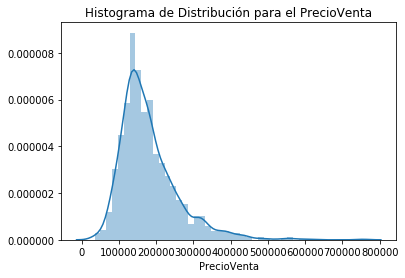

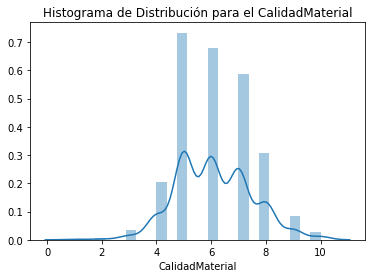

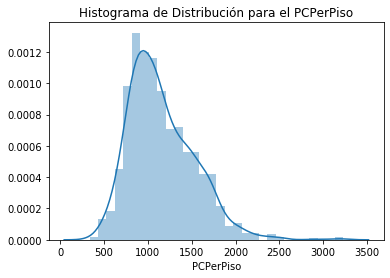

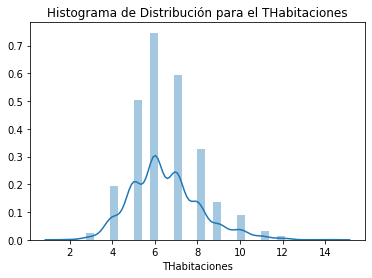

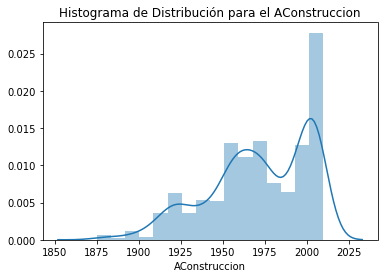

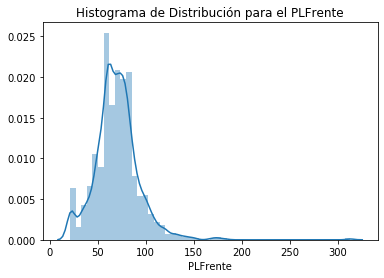

In [8]:
#Graficamos los histogramas para cada una de las variables

for columna in df_entrenamiento.columns:
    #Quitamos los NaN, ya que hay una variable que contiene valores nulos (PLFrente)
    datos_sn = df_entrenamiento[columna].dropna()
    #Definimos los elementos para la gráfica
    fig=plt.figure()
    ax=fig.add_subplot(sns.distplot(datos_sn))
    ax.grid()
    ax.set_xlabel(columna)
    ax.set_title("Histograma de Distribución para el " + columna )
    ax.grid()
    plt.show()
    

##### 3.3 Para cada variable independiente x :  
* Calcular el coeficiente de correlación entre x y y
* Graficar x vs y (scatterplot) usando matplotlib
* Colocar el coeficiente de correlación y colocarlo  como parte del título de la gráfica. 


In [9]:
#Calculamos el coeficiente de correlación
df_correlacion = df_entrenamiento.corr()
df_correlacion

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
PrecioVenta,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
CalidadMaterial,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
PCPerPiso,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
THabitaciones,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
AConstruccion,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
PLFrente,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


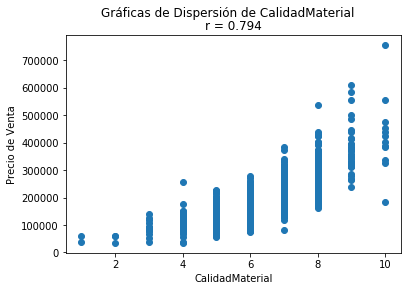

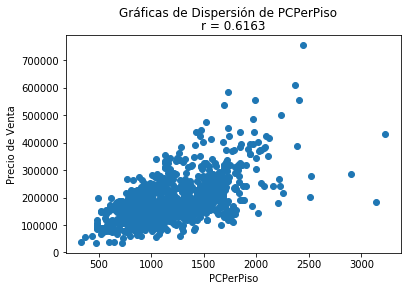

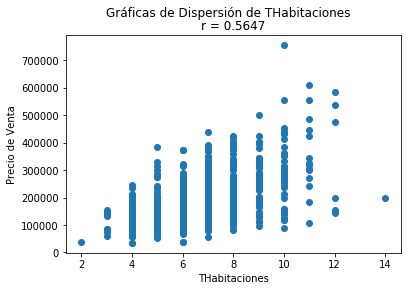

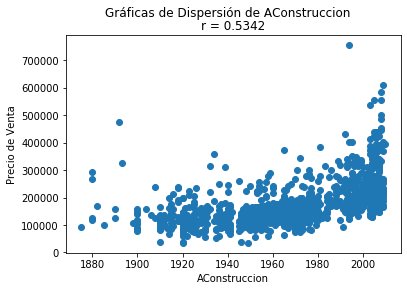

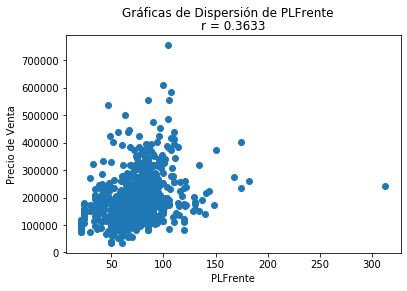

In [10]:
#Gráficas de dispersión para cada una de las variables independientes
for columna in df_entrenamiento.columns:
    if(columna != 'PrecioVenta'): #La variable "y" es la variable de intéres por lo cual es fija
        #calculamos el coeficiente de correlación de cada una de las variables independientes con respecto a la variable dependiente
        correlacion = round(df_entrenamiento['PrecioVenta'].corr(df_entrenamiento[columna]),4)
        
        fig = plt.figure()
        fig.suptitle("Gráficas de Dispersión de " + columna)
        ax = fig.add_subplot(1,1,1)
        ax.scatter(df_entrenamiento[columna], df_entrenamiento["PrecioVenta"])
        ax.set_xlabel(columna)
        ax.set_ylabel("Precio de Venta")
        ax.set_title('r = ' + str(correlacion))
    
plt.show()

### 4. Elección de Variables
Basado en la gráfica y el coeficiente de correlación  de cada par x,y elegir  las 2 variables con más potencial predictivo(la 2 que presentan mayor correlación).  

* **Se ha decidido elegir las variables de Calidad del Material y Área del Primer Piso (en pies cuadrados), ya que de acuerdo a su coeficiente de correlación, son las dos variables que mejor explican o estiman el precio de venta (Variable Dependiente)**

### 5. Crear una función para entrenar un modelo de regresión lineal de una variable 
$y = mx +b$  

***La función recibe como argumentos:***
* vector con  la variable independiente “x” ,  
* vector con la variable dependiente “y”,  
* un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
* un entero  “imprimir_error_cada”  , que nos indica cada cuantas iteraciones queremos imprimir el número de iteración y el error
* escalar lr(learning rate), este es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.


***La función debe:***
* Crear una matriz de 2 columnas ,la primera columna corresponde al vector de datos “x” y la segunda columna de la matriz para todas las filas es igual a uno. 
* Inicializar los parámetros del modelo en un vector (m,b)
* por cada epoch(iteración):
    * Calcular yhat(predicción o estimación) para todas las observaciones de manera simultánea(vectorizada) 
    * Calcular el error o costo usando: y,y_hat. Esto produce un escalar que indica el error.  
        $error=1/2*promedio((y - yhat)^2)$
    * Almacenar en un vector el error de cada iteración. 
    * Calcular el gradiente del error respecto de cada parámetro.  
         $gradiente_m=promedio((yhat - y)*x)$  
         $gradiente_b=promedio(yhat - y)$
    * Actualizar los parámetros del modelo.  
         $m=m - learningRate * gradiente_m$  
         $b=b - learningRate * gradiente_b$
    * Almacenar en una estructura de datos el modelo resultante.  

***La función devuelve 2 resultados:***
* La estructura de datos conteniendo el modelo de cada iteración.
* El error de cada iteración


In [11]:
#Definimos la función para calcular la regresión lineal de forma manual
def regesion_lineal(x_vec, y_vec, epochs, imprimir_error_cada, lr):
    
    y = np.array(y_vec) #Convertimos la variable y a un vector
    x = np.vstack(x_vec) #Convertir la variable x a un vector vertical
    x_m = np.concatenate((x, np.ones_like(x)), axis = 1) #Formamos la matriz de n*2
    x_mh = x_m.T #Por medio de la transpuesta convertimos a matriz de 2*n para los calculos posteriores

    #Inicializamos  valores de los parámetros
    m = 0
    b = 0
    parametros = np.array([m,b], dtype = "float64")  #parámetros del modelo
    errores = []       #Listado de errores
    resultados = dict() #Diccionario para almacenar los resultados del modelo, la llave es el número de iteración y el valor un vector con los parámetros que hemos calculado

    for i in range(1,epochs+1):
        
        y_hat = np.dot(x_m,parametros)  #Calculamos "y" estimada
        error = 0.5 * (np.mean(np.power((y - y_hat),2))) #Calculamos el error para estos parámetros
        errores.append(error)   #Guardamos el error
        gradientes = np.mean(((y_hat-y) * x_mh), axis = 1) #Calculamos los gradientes, el primer elemento del vector es el gradiente de m y el segundo el gradiente de b
        #Calculamos nuevos valores para m y b
        parametros = parametros - (lr * gradientes)
        #Almacenamos los resultados del modelo en un diccionario
        resultados[i] = parametros
        #Imprimir informaciòn en pantalla cada cierto numero de iteraciones, indicado en la variable imprimir_error_cada
        if i % imprimir_error_cada == 0:   
            print("El número de iteración es: ", i, "El error del modelo: ",error)

    return resultados, errores


In [12]:
#Entrenando el modelo manual de regresión líneal para la variable calidad general y de acabados
regesion_lineal(df_entrenamiento['CalidadMaterial'], df_entrenamiento['PrecioVenta'], 10, 2, 0.000001 )


El número de iteración es:  2 El error del modelo:  19408278249.626297
El número de iteración es:  4 El error del modelo:  19405390989.55459
El número de iteración es:  6 El error del modelo:  19402504192.246643
El número de iteración es:  8 El error del modelo:  19399617857.62829
El número de iteración es:  10 El error del modelo:  19396731985.625366


({1: array([1.18794767, 0.18059028]),
  2: array([2.37584777, 0.36117313]),
  3: array([3.5637003 , 0.54174855]),
  4: array([4.75150526, 0.72231654]),
  5: array([5.93926265, 0.90287711]),
  6: array([7.12697247, 1.08343025]),
  7: array([8.31463473, 1.26397596]),
  8: array([9.50224942, 1.44451424]),
  9: array([10.68981656,  1.6250451 ]),
  10: array([11.87733613,  1.80556854])},
 [19409722053.22175,
  19408278249.626297,
  19406834561.740334,
  19405390989.55459,
  19403947533.059776,
  19402504192.246643,
  19401060967.1059,
  19399617857.62829,
  19398174863.804535,
  19396731985.625366])

### 6. Crear una función que nos permita visualizar con matplotlib cómo cambia el error en el tiempo
crear una función que tome como parámetro el vector de errores generados por la función de entrenamiento y grafique en el eje “x” el número de iteración y en el eje “y”  el error para esa iteración.

In [13]:
def graficar_perdida(iteraciones, errores):  
    y = np.array(errores) 
    x = np.linspace(1, len(iteraciones), len(iteraciones), endpoint=True) #Creamos un arreglo de numeros igual a las iteraciones
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) #creamos un canvas con  1 fila, 1 columna y referencia a una primera gráfica
    ax.plot(x,y)    #graficamos para "x" y "y"
    ax.set_xlabel('Iteración')
    ax.set_ylabel('Error')
    ax.set_title('Gráfica de Error por Iteración') 
    plt.show()

El número de iteración es:  20000 El error del modelo:  5021095031.296429
El número de iteración es:  40000 El error del modelo:  2123924177.454944
El número de iteración es:  60000 El error del modelo:  1540335440.408089
El número de iteración es:  80000 El error del modelo:  1422483692.7232938
El número de iteración es:  100000 El error del modelo:  1398387961.9910474
El número de iteración es:  120000 El error del modelo:  1393166515.025794
El número de iteración es:  140000 El error del modelo:  1391745262.6246357
El número de iteración es:  160000 El error del modelo:  1391089709.7913115


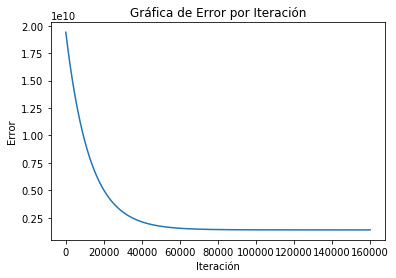

In [14]:
#Prabando la función para la variabe de calidad de materiales y acabados
r_cm, e_cm = regesion_lineal(df_entrenamiento['CalidadMaterial'], df_entrenamiento['PrecioVenta'], 160000, 20000, 0.000001)
graficar_perdida(r_cm, e_cm)


El número de iteración es:  250 El error del modelo:  1968098772.1876636
El número de iteración es:  500 El error del modelo:  1968093004.599749
El número de iteración es:  750 El error del modelo:  1968092963.5108027
El número de iteración es:  1000 El error del modelo:  1968092922.423666


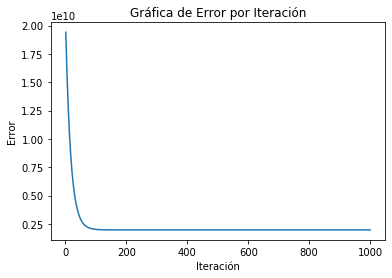

In [15]:
#Prabando la función con la variable de área del primer piso
r_app, e_pv = regesion_lineal(df_entrenamiento['PCPerPiso'], df_entrenamiento['PrecioVenta'], 1000,250,0.00000002 )
graficar_perdida(r_app, e_pv)

### 7. Crear una función que nos permita visualizar con matplotlib cómo evoluciona el modelo entrenado en el tiempo
Esta función debe tomar como parámetro la estructura de datos conteniendo el historial de modelos ,y un valor “n” que indica cada cuantas iteraciones graficar el modelo resultante,  por ejemplo para n=3 la función debe graficar la recta correspondiente al modelo junto a los datos cada 3 iteraciones.

In [16]:
def graficar_rmodelo(x, y, resultado_m, n):    
    xn = np.array(x)
    #x1 = np.linspace(0,np.max(x), 100, endpoint= True)

    for i in range(1,len(resultado_m)+1):
        #Calcular la f(x) con los parámetros proporcionados por el modelo
        funcion = (resultado_m[i][0] * xn) + resultado_m[i][1]
        
        if i % n == 0: #Graficamos los datos reales y el modelo cada n iteraciones
            fig = plt.figure()
            ax = fig.add_subplot(1,1,1) 
            ax.scatter(xn,y) #Datos reales
            ax.plot(x,funcion, 'red') #Datos estimados por el modelo manual
            ax.set_xlabel(str(x.name))
            ax.set_ylabel(str(y.name))
            ax.set_title('No. Iteración: ' + str(i))
            plt.show()

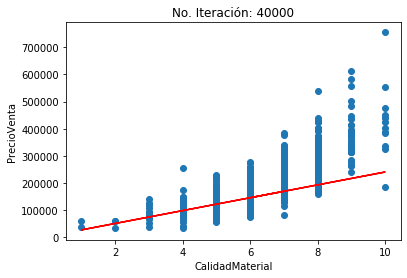

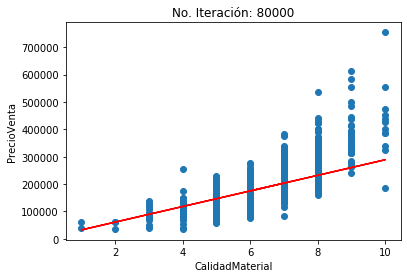

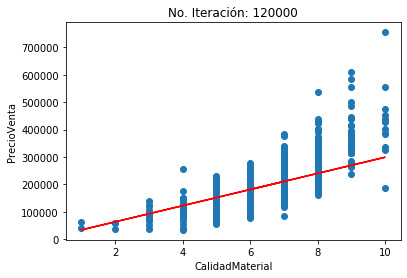

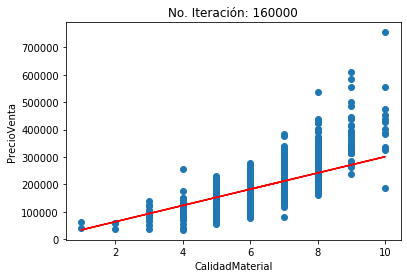

In [17]:
graficar_rmodelo(df_entrenamiento['CalidadMaterial'],df_entrenamiento['PrecioVenta'], r_cm, 40000)

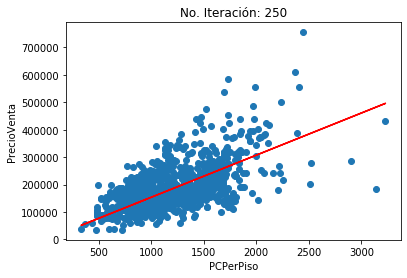

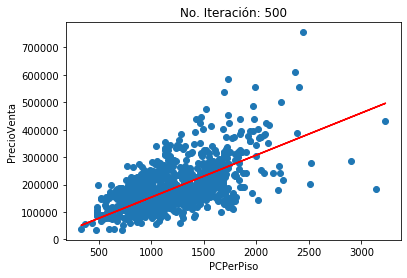

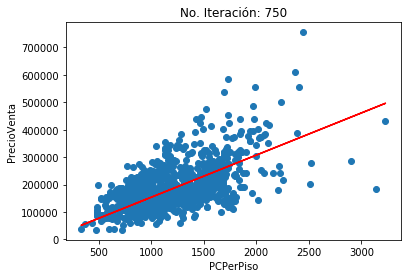

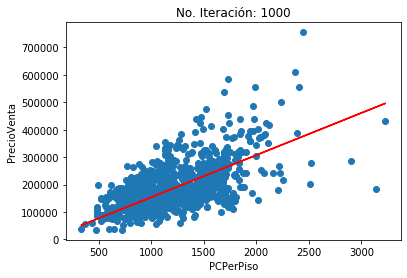

In [18]:
graficar_rmodelo(df_entrenamiento['PCPerPiso'],df_entrenamiento['PrecioVenta'], r_app, 250)

Utilizar las funciones del punto anterior para entrenar modelos de regresión lineal $y=mx +  b$, para cada una de las variables “x” elegidas, basándose en las  funciones para graficar las curvas de aprendizaje  y comparación del modelo vs los datos elegir el número de “epochs” o iteraciones a entrenar el modelo(y experimentar con el learning _rate)  
**Criterio:** El error debe disminuir lo más posible por lo cual la curva de aprendizaje debe disminuir hasta que ya no disminuya mucho (se estabilice o converja), si el error baja y comienza a subir debemos usar menos iteraciones.


El número de iteración es:  1000 El error del modelo:  1390124617.000355
El número de iteración es:  2000 El error del modelo:  1385559988.070709
El número de iteración es:  3000 El error del modelo:  1381082836.2570267
El número de iteración es:  4000 El error del modelo:  1376689679.4645576
El número de iteración es:  5000 El error del modelo:  1372378941.8779814


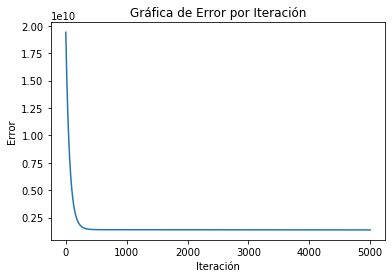

In [19]:
#Prabando la función para la variabe de calidad de material con menos iteraciones y modificando el lr
r_cm, e_cm = regesion_lineal(df_entrenamiento['CalidadMaterial'], df_entrenamiento['PrecioVenta'], 5000, 1000, 0.0002)
graficar_perdida(r_cm, e_cm)

El número de iteración es:  500 El error del modelo:  1968099262.283183
El número de iteración es:  1000 El error del modelo:  1968093004.5179553
El número de iteración es:  1500 El error del modelo:  1968092963.4286287
El número de iteración es:  2000 El error del modelo:  1968092922.3414917


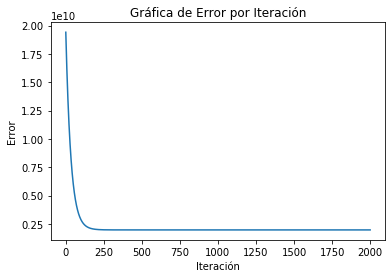

In [20]:
#Prabando la función con la variable de área del primer piso con más iteraciones y modificando el lr
r_app, e_pv = regesion_lineal(df_entrenamiento['PCPerPiso'], df_entrenamiento['PrecioVenta'], 2000,500,0.00000001) 
graficar_perdida(r_app, e_pv)

### 8. Modelo con Scikit-learn

Para cada una de las variables x seleccionadas, usar scikit-learn para entrenar un modelo de regresión lineal.

In [21]:
#obtenemos la variable dependiente "y" y la convertimos en un dataframe
PrecioVenta = pd.DataFrame(df_entrenamiento['PrecioVenta'])

#obtenemos la primera variable independiente "x" y la convertimos en un dataframe
CalidadGeneral = pd.DataFrame(df_entrenamiento['CalidadMaterial'])
#Aplicamos el modelo para estas variables x, y
rl_calidad_general = LinearRegression().fit(CalidadGeneral, PrecioVenta)

#Con algunas de las funciones de la regresión lineal en scikit-learn podemos obtener fácilmente también la pendiente y el intercepto de la función de la recta
pendiente = rl_calidad_general.coef_
intercepto = rl_calidad_general.intercept_

print("Pendiente e Interecepto del Modelo para la Variable de Calidad General: ", float(pendiente), float(intercepto))

Pendiente e Interecepto del Modelo para la Variable de Calidad General:  45411.998779159156 -96469.57131873982


In [22]:
#obtenemos la segunda variable independiente "x" y la convertimos en un dataframe
AreaPPiso = pd.DataFrame(df_entrenamiento['PCPerPiso'])
#Aplicamos el modelo para estas variables x, y
rl_area_ppiso = LinearRegression().fit(AreaPPiso, PrecioVenta)

pendiente = rl_area_ppiso.coef_
intercepto = rl_area_ppiso.intercept_

print("Pendiente e Interecepto del Modelo para la Variable de Calidad General: ", float(pendiente), float(intercepto))

Pendiente e Interecepto del Modelo para la Variable de Calidad General:  129.95124228715716 30324.585174963664


### 9. Cálculo de la Estimación o Predicción

Para cada variable independiente x elegida, crear una función que usando el modelo entrenado manualmente y el modelo de scikit-learn(enviados como parámetros a la funcion) calcule la estimación o predicción de cada uno de estos y devuelva como resultado una predicción estimada promediando las predicciones de los 2  modelos, la función debe recibir como parámetro adicional un vector de cualquier tamaño de x  y devolver 3 vectores cada uno del mismo tamaño del vector x.   
* La predicción con el modelo entrenado manualmente  
* La predicción con el modelo de scikit-learn
* La combinación(promedio) de las 2 anteriores.


In [23]:
def prediccion_modelos(modelo_manual, modelo_sklearn, x_vec):
    #Aplicamos la función de predict a la varible x para obtener la predicción del modelo de sklearn
    prediccion_sklearn = modelo_sklearn.predict(pd.DataFrame(x_vec)).ravel()

    #Obtenemos la predicción del modelo manual, mediante la función fx de la recta
    prediccion_manual = np.array(modelo_manual[len(modelo_manual)][0] * x_vec + modelo_manual[len(modelo_manual)][1])
    #Calculamos un promedio de las dos predicciones
    promedio_modelos = (prediccion_manual + prediccion_sklearn) * 0.5
    
    return (prediccion_manual, prediccion_sklearn, promedio_modelos)

### 10. Comparativa entre Modelo Manual y Modelo usando Scikit-learn

Usando el 20% de los datos de validación, aplicamos los modelos predictivos para estimar la variable dependiente  y usando los valores reales de “y” calculamos el error de cada modelo.  
Para cada variable independiente “x” elegida : 
* Graficar el  error de cada modelo para esta variable “x”
* Concluir cuál modelo para la  variable “x” es el mejor a ser usado 


In [24]:
#Convertimos el set de datos que vamos a utlizar para validación a dataframe para que sea más fácil identificar cada variable "x"
#Agregar nombres a las columnas de acuerdo a la información proporcionada
df_validacion = pd.DataFrame(data = ds_validacion, columns = ["PrecioVenta", "CalidadMaterial","PCPerPiso", "THabitaciones", "AConstruccion", "PLFrente"])

#Conversion para los datos de calidad del material, el total de habitaciones y el año de contruscción, ya que son enteros
df_validacion = df_validacion.astype({"CalidadMaterial" : int, "THabitaciones" : int, "AConstruccion" : int})

df_validacion.head()

,PrecioVenta,CalidadMaterial,PCPerPiso,THabitaciones,AConstruccion,PLFrente
0,235000.0,6,1236.0,7,1935,120.0
1,625000.0,10,1831.0,10,1995,118.0
2,171000.0,6,1118.0,6,1977,76.0
3,163000.0,6,1261.0,6,1958,76.0
4,171900.0,7,625.0,5,2006,35.0


In [25]:
#Se aplica la función para calcular las predicciones de ambos modelos
#Predicciones para la variable Calidad en los materiales de contrucción
pred_manual_calidadm, pred_skl_calidadm, promedio_calidadm = prediccion_modelos(r_cm, rl_calidad_general, df_validacion['CalidadMaterial'])

#Predicciones para la variable de área del primer piso
pred_manual_app, pred_skl_app, promedio_app = prediccion_modelos(r_app, rl_area_ppiso, df_validacion['PCPerPiso'])


In [26]:
#Fuención para calcular el error en la prediccion de cada madelo
def calcular_error(y, y_hat):
    #Aplicamos la funcion proporcionada para calcular el error
    error = 0.5 * (np.mean(np.power((y - y_hat),2)))
    return error

In [27]:
#Obteniendo el error de cada uno de los modelos para las variables elegidas
y_real = df_validacion['PrecioVenta']
#Error de ambos modelos para la variable de calidad en el material
error_manual_cm = calcular_error(y_real, pred_manual_calidadm)
error_skl_cm = calcular_error(y_real, pred_skl_calidadm)

#Error de ambos modelos para la variable de área del primer piso
error_manual_app = calcular_error(y_real, pred_manual_app)
error_skl_app = calcular_error(y_real, pred_skl_app)

#Creamos dos listas para guardar el error de las variables para cada uno de los modelos
errores_modelo_manual = [error_manual_cm, error_manual_app]
errores_modelo_skl = [error_skl_cm, error_skl_app]

print("Error Modelo Manual para la Varaible Calidad General: ", error_manual_cm)
print("Error Modelo Manual para la Varaible Área del prime Piso: ", error_manual_app)
print("******************************************************************************")
print("Error Modelo de Scikit-learn  para la Varaible Calidad General: ", error_skl_cm)
print("Error Modelo de scikit-learn  para la Varaible Área del prime Piso: ", error_skl_app)

Error Modelo Manual para la Varaible Calidad General:  1543140822.777838
Error Modelo Manual para la Varaible Área del prime Piso:  2437914028.533786
******************************************************************************
Error Modelo de Scikit-learn  para la Varaible Calidad General:  1315091304.4743197
Error Modelo de scikit-learn  para la Varaible Área del prime Piso:  2292769137.345938


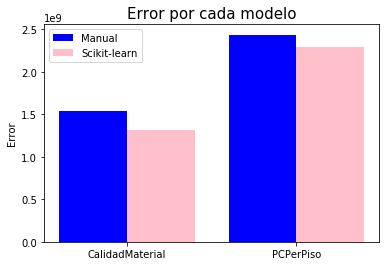

In [28]:
#Graficar el  error de cada modelo para esta variable “x” y realizar la comparativa entre modelos

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
width = 0.4  #Tamaño de las barras
#Puntos en el eje x en donde posicionaremos los puntos
x = np.arange(len(errores_modelo_manual))
rxm = x - width/2
rxs = x + width/2

#gráfico de barras para cada uno de los modelos
barras1 = ax.bar(rxm, errores_modelo_manual, width, label = 'Manual', color='blue')
barras2 = ax.bar(rxs, errores_modelo_skl, width, label = 'Scikit-learn', color='pink')

ax.set_xticks(x)
ax.set_xticklabels(('CalidadMaterial', 'PCPerPiso'))
ax.set_ylabel('Error')
ax.set_title('Error por cada modelo', fontdict={'fontsize':15})
ax.legend()

plt.show()


### Conclusión:
Con base en la comparativa de errores producidos por cada modelo de la gráfica anterior, es mejor el modelo obtenido con el paquete de Scikit-learn, ya que el mejor modelo es el que logra disminuir la distancia entre los puntos reales y la recta, es decir el  que logra disminuir el error y en este caso es el modelo obtenido con Scikit-learn tanto para la variable de Calidad en General y Acabados como para la variable de Área del primer piso (en pies cuadrados)